In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('data/all_opinions.csv', encoding='utf-8')
#print(df.head())
#print(df.columns)
df['case_name'] = df['case_name'].str.upper()
print(df.head(10))

           author_name    category  per_curiam  \
0      Justice Roberts    majority       False   
1       Justice Thomas  concurring       False   
2       Justice Breyer  dissenting       False   
3        Justice Taney    majority       False   
4       Justice Pitney    majority       False   
5       Justice Harlan    majority       False   
6           per_curiam  per_curiam        True   
7       Justice Miller    majority       False   
8  Justice Frankfurter    majority       False   
9       Justice Swayne    majority       False   

                               case_name  date_filed federal_cite_one  \
0  MCCUTCHEON V. FEDERAL ELECTION COMM'N  2014-04-02     572 U.S. 185   
1  MCCUTCHEON V. FEDERAL ELECTION COMM'N  2014-04-02     572 U.S. 185   
2  MCCUTCHEON V. FEDERAL ELECTION COMM'N  2014-04-02     572 U.S. 185   
3                      EX PARTE CRENSHAW  1841-02-18      40 U.S. 119   
4    RICHARDS V. WASHINGTON TERMINAL CO.  1914-05-04     233 U.S. 546   
5          

In [34]:
print(df['absolute_url'].iloc[8])

https://www.courtlistener.com/opinion/103237/palmer-v-massachusetts/


In [3]:
df.isna().sum()

author_name                    0
category                       0
per_curiam                     0
case_name                      0
date_filed                     0
federal_cite_one           16583
absolute_url                   0
cluster                        0
year_filed                     0
scdb_id                     1763
scdb_decision_direction     1768
scdb_votes_majority         1763
scdb_votes_minority         1763
text                           0
dtype: int64

<AxesSubplot:>

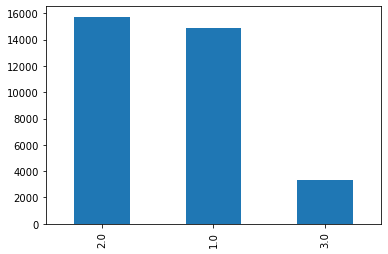

In [4]:
df['scdb_decision_direction'].value_counts().plot(kind='bar')

In [21]:
scdb_df = pd.read_csv('data/scdb_2021_case_based.csv', encoding="ISO 8859-1")
scdb_df.head()
print(scdb_df.shape)

(13629, 53)


<AxesSubplot:>

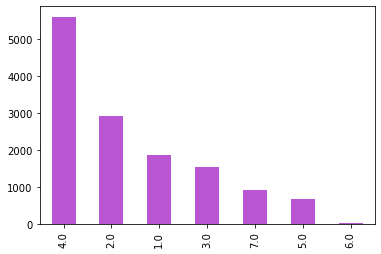

In [6]:
scdb_df['authorityDecision1'].value_counts().plot(kind='bar', color='mediumorchid')

In [24]:
scdb_df = scdb_df.rename({'usCite': 'federal_cite_one', 'majVotes': 'scdb_votes_majority', 'minVotes': 'scdb_votes_minority', 'caseName': 'case_name'}, axis='columns')


In [25]:
print(df.columns)
print(scdb_df.columns)

Index(['author_name', 'category', 'per_curiam', 'case_name', 'date_filed',
       'federal_cite_one', 'absolute_url', 'cluster', 'year_filed', 'scdb_id',
       'scdb_decision_direction', 'scdb_votes_majority', 'scdb_votes_minority',
       'text'],
      dtype='object')
Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'federal_cite_one', 'sctCite', 'ledCite', 'lexisCite',
       'term', 'naturalCourt', 'chief', 'docket', 'case_name', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
 

In [26]:
df_merged = df.merge(scdb_df[['federal_cite_one', 'case_name']], on='case_name', how='outer')
print(df_merged.isna().sum())
print(df_merged.shape)

#df5 = df5.merge(df1[['Longitude', 'ID']],on='ID',how="left")
#df5['Longitude_y'] = df5['Longitude_y'].fillna(df5['Longitude_x'])
#df5.drop(["Longitude_x"], inplace=True, axis=1)
#df5.rename(columns={'Longitude_y':'Longitude'},inplace=True)

author_name                13625
category                   13625
per_curiam                 13625
case_name                      0
date_filed                 13625
federal_cite_one_x         36292
absolute_url               13625
cluster                    13625
year_filed                 13625
scdb_id                    15388
scdb_decision_direction    15393
scdb_votes_majority        15388
scdb_votes_minority        15388
text                       13625
federal_cite_one_y         36290
dtype: int64
(49407, 15)


In [27]:
print(df_merged.head())

       author_name    category per_curiam  \
0  Justice Roberts    majority      False   
1   Justice Thomas  concurring      False   
2   Justice Breyer  dissenting      False   
3    Justice Taney    majority      False   
4   Justice Pitney    majority      False   

                               case_name  date_filed federal_cite_one_x  \
0  MCCUTCHEON V. FEDERAL ELECTION COMM'N  2014-04-02         329 U.S. 1   
1  MCCUTCHEON V. FEDERAL ELECTION COMM'N  2014-04-02        329 U.S. 14   
2  MCCUTCHEON V. FEDERAL ELECTION COMM'N  2014-04-02        329 U.S. 14   
3                      EX PARTE CRENSHAW  1841-02-18        329 U.S. 14   
4    RICHARDS V. WASHINGTON TERMINAL CO.  1914-05-04        329 U.S. 14   

                                        absolute_url  \
0  https://www.courtlistener.com/opinion/2659301/...   
1  https://www.courtlistener.com/opinion/2659301/...   
2  https://www.courtlistener.com/opinion/2659301/...   
3  https://www.courtlistener.com/opinion/86166/ex...  

In [9]:
df_merged[df_merged['federal_cite_one_x'].isnull()]
df_merged['federal_cite_one_x'] = df_merged['federal_cite_one_y'].fillna(df_merged['federal_cite_one_y'])

In [10]:
print(df_merged.isna().sum())

author_name                0
category                   0
per_curiam                 0
case_name                  0
date_filed                 0
federal_cite_one_x         0
absolute_url               0
cluster                    0
year_filed                 0
scdb_id                    0
scdb_decision_direction    0
scdb_votes_majority        0
scdb_votes_minority        0
text                       0
federal_cite_one_y         0
dtype: int64


In [11]:
print(df_merged.shape)

(6, 15)


In [12]:
df_merged.head(10)

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one_x,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,federal_cite_one_y
0,Justice Black,majority,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,A Michigan circuit judge summarily sent the pe...,333 U.S. 257
1,Justice Rutledge,concurring,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,I join in the Court's opinion and decision. Bu...,333 U.S. 257
2,Justice Jackson,dissenting,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,The principal ground assigned for reversal of ...,333 U.S. 257
3,Justice Vinson,majority,False,EX PARTE COLLETT,1949-05-31,337 U.S. 55,https://www.courtlistener.com/opinion/104671/e...,https://www.courtlistener.com/api/rest/v3/clus...,1949,1948-077,1.0,7.0,2.0,In this case we must decide whether the venue ...,337 U.S. 55
4,Justice Vinson,majority,False,EX PARTE COLLETT,1949-05-31,337 U.S. 55,https://www.courtlistener.com/opinion/104671/e...,https://www.courtlistener.com/api/rest/v3/clus...,1949,1948-077,1.0,7.0,2.0,In this case we must decide whether the venue ...,337 U.S. 55
5,per_curiam,per_curiam,True,IN RE DISBARMENT OF ISSERMAN,1954-10-14,345 U.S. 286,https://www.courtlistener.com/opinion/105240/i...,https://www.courtlistener.com/api/rest/v3/clus...,1954,1954-001,2.0,3.0,3.0,"April 6, 1953, an order was entered disbarring...",345 U.S. 286


In [13]:
df_merged.drop(['federal_cite_one_y'], axis=1, inplace=True)

In [14]:
df_merged.head()

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one_x,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text
0,Justice Black,majority,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,A Michigan circuit judge summarily sent the pe...
1,Justice Rutledge,concurring,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,I join in the Court's opinion and decision. Bu...
2,Justice Jackson,dissenting,False,IN RE OLIVER,1948-03-08,333 U.S. 257,https://www.courtlistener.com/opinion/104521/i...,https://www.courtlistener.com/api/rest/v3/clus...,1948,1947-048,2.0,7.0,2.0,The principal ground assigned for reversal of ...
3,Justice Vinson,majority,False,EX PARTE COLLETT,1949-05-31,337 U.S. 55,https://www.courtlistener.com/opinion/104671/e...,https://www.courtlistener.com/api/rest/v3/clus...,1949,1948-077,1.0,7.0,2.0,In this case we must decide whether the venue ...
4,Justice Vinson,majority,False,EX PARTE COLLETT,1949-05-31,337 U.S. 55,https://www.courtlistener.com/opinion/104671/e...,https://www.courtlistener.com/api/rest/v3/clus...,1949,1948-077,1.0,7.0,2.0,In this case we must decide whether the venue ...


In [15]:
df_merged.to_csv('all_opinions_up_through_2022.csv')

In [16]:
df.loc[:, ['federal_cite_one']] = scdb_df[['federal_cite_one']]

In [17]:
df.head(100)

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text
0,Justice Roberts,majority,False,MCCUTCHEON V. FEDERAL ELECTION COMM'N,2014-04-02,329 U.S. 1,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,There is no right more basic in our democracy ...
1,Justice Thomas,concurring,False,MCCUTCHEON V. FEDERAL ELECTION COMM'N,2014-04-02,329 U.S. 14,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,I adhere to the view that this Court’s decisio...
2,Justice Breyer,dissenting,False,MCCUTCHEON V. FEDERAL ELECTION COMM'N,2014-04-02,329 U.S. 14,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,"Nearly 40 years ago in Buckley v. Valeo, 424 U..."
3,Justice Taney,majority,False,EX PARTE CRENSHAW,1841-02-18,329 U.S. 14,https://www.courtlistener.com/opinion/86166/ex...,https://www.courtlistener.com/api/rest/v3/clus...,1841,1841-005,2.0,9.0,0.0,This case was brought here by an appeal from t...
4,Justice Pitney,majority,False,RICHARDS V. WASHINGTON TERMINAL CO.,1914-05-04,329 U.S. 14,https://www.courtlistener.com/opinion/98178/ri...,https://www.courtlistener.com/api/rest/v3/clus...,1914,1913-149,1.0,8.0,1.0,"Plaintiff in error, who was plaintiff below, c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Justice Fuller,majority,False,ASPEN MINING & SMELTING CO. V. BILLINGS,1893-10-23,330 U.S. 75,https://www.courtlistener.com/opinion/93671/as...,https://www.courtlistener.com/api/rest/v3/clus...,1893,1893-005,2.0,8.0,0.0,"By the 32d rule as amended, (146 U.S. 707,) ca..."
96,Justice Mckenna,majority,False,HARTIGAN V. UNITED STATES,1904-12-06,330 U.S. 75,https://www.courtlistener.com/opinion/96189/ha...,https://www.courtlistener.com/api/rest/v3/clus...,1904,1904-158,1.0,9.0,0.0,"The contention of appellant is that, as a cade..."
97,Justice White,majority,False,UNITED STATES V. BIGGS,1909-01-04,330 U.S. 75,https://www.courtlistener.com/opinion/96920/un...,https://www.courtlistener.com/api/rest/v3/clus...,1909,1908-044,1.0,9.0,0.0,It is adequate to an understanding of the ques...
98,Justice Douglas,majority,False,MONROE V. PAPE,1961-02-20,330 U.S. 75,https://www.courtlistener.com/opinion/106170/m...,https://www.courtlistener.com/api/rest/v3/clus...,1961,1960-041,2.0,8.0,1.0,This case presents important questions concern...


In [18]:
col = 'case_name'
cols_to_replace = ['federal_cite_one', 'scdb_id', 'scdb_decision_direction', 'scdb_votes_majority', 'scdb_votes_minority']

In [19]:
df.loc[scdb_df[col].isin(df[col]), cols_to_replace] = scdb_df.loc[scdb_df[col].isin(scdb_df[col]), cols_to_replace].values

#df3.loc[df3[col].isin(df1[col]), cols_to_replace] = df1.loc[df1[col].isin(df3[col]),cols_to_replace].values

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['scdb_id', 'scdb_decision_direction'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
df.isna().sum()

In [ ]:
# Get the sizes of each dataframe before merging them:
print(df.shape)
print(scdb_df.shape)

In [ ]:
print(df.columns)
print(scdb_df.columns)

In [ ]:
df_with_scdb_merged = df.merge(scdb_df, on=['federal_cite_one', 'case_name', 'scdb_votes_majority', 'scdb_votes_minority'], how='left')


In [ ]:
print(df_with_scdb_merged.shape)

In [ ]:
df_with_scdb_merged.isna().sum()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df_with_scdb_merged.head(5))
print(df_with_scdb_merged.shape)